### Coefficient of Variation(CV)

When we moved from variance to standard deviation, we were looking to get to units that made sense; however, if we then want to compare the level of dispersion of one dataset to another, we would need to have the same units once again. One way around this is to calculate the coefficient of variation (CV), which is unitless. The CV is the ratio of the standard deviation to the mean.

- Since it is unitless we can use it to compare two features with different scale or different unit
- It is the ratio of standarad deviation to te mean

`CV=s/mean`

In [1]:
import pandas as pd
data = pd.read_csv('housing.csv')

In [30]:
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [2]:
age_std = data['housing_median_age'].std()
age_mean = data['housing_median_age'].mean()

In [3]:
val_std = data['median_house_value'].std()
val_mean = data['median_house_value'].mean()

In [33]:
age_cv = age_std/age_mean
val_cv = val_std/val_mean

In [34]:
print(f'The Standard Deviation of house age: {age_std}')
print(f'The Mean of house age: {age_mean}')
print(f'The standard deviation of house value: {val_std}')
print(f'The Mean of house value: {val_mean}')
print(f'The coefficient of variation of house age: {age_cv}')
print(f'The coefficient of variation of house value: {val_cv}')

The Standard Deviation of house age: 12.585557612111637
The Mean of house age: 28.639486434108527
The standard deviation of house value: 115395.6158744132
The Mean of house value: 206855.81690891474
The coefficient of variation of house age: 0.4394477408338832
The coefficient of variation of house value: 0.5578553100357124


In [35]:
data['housing_median_age'].min()
# data['housing_median_age'].max()

1.0

In [36]:
data['median_house_value'].min()

14999.0

In [37]:
data['median_house_value'].max()

500001.0

In [38]:
import numpy as np

In [39]:
weights = [55,60,58,65,62]
heights = [160,165,170,155,168,500,800]
std_weights = np.std(weights)
std_heights = np.std(heights)

#mean
mean_weights = np.mean(weights)
mean_heights = np.mean(heights)

#cv
cv_weights = (std_weights/mean_weights)
cv_heights = (std_heights/mean_heights)
cv_heights

0.773205346801532

In [40]:
cv_weights

0.05676462121975467

In [41]:
mean_heights

302.57142857142856

In [42]:
mean_weights

60.0

### Data Summarization

We have seen many examples of descriptive statistics that we can use to summarize our data by its center and dispersion; in practice, looking at the 5-number summary and visualizing the distribution prove to be helpful first steps before diving into some of the other aforementioned metrics. The 5-number summary, as its name indicates, provides five descriptive statistics that summarize our data

### Quartile

In [43]:
data['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

### InterQuartile Range(IQR)

- So far, other than the range, we have discussed mean-based measures of dispersion; now, we will look at how we can describe the spread with the median as our measure of central tendency. As mentioned earlier, the median is the 50th percentile or the 2nd quartile (Q2). Percentiles and quartiles are both quantiles—values that divide data into equal groups each containing the same percentage of the total data. Percentiles divide the data into 100 parts, while quartiles do so into four (25%, 50%, 75%, and 100%

- Since quantiles neatly divide up our data, and we know how much of the data goes in each section, they are a perfect candidate for helping us quantify the spread of our data. One common measure for this is the interquartile range (IQR), which is the distance between the 3rd and 1st quartiles.

In [46]:
import numpy as np

In [48]:
q1 = np.quantile(data['housing_median_age'],q=0.25)
q2 = np.quantile(data['housing_median_age'],q=0.50)
q3 = np.quantile(data['housing_median_age'],q=0.75)
q4 = np.quantile(data['housing_median_age'],q=1)

In [50]:
print(f'First Quartile of Age: {q1} ')
print(f'Second Quartile of Age:{q2} ')
print(f'Third Quartile of Age:{q3} ')
print(f'Fourth Quartile of Age: {q4}')

First Quartile of Age: 18.0 
Second Quartile of Age:29.0 
Third Quartile of Age:37.0 
Fourth Quartile of Age: 52.0


In [54]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [52]:
np.quantile(data['housing_median_age'],q=0.15)

15.0

### IQR

- distance between 3rd and first quartile
- Q3-Q1

The IQR gives us the spread of data around the median and quantifies how much dispersion we have in the middle 50% of our distribution. It can also be useful when checking the data for outliers. In addition, the IQR can be used to calculate a unitless measure of dispersion


### Box and Whisker Plot

A box plot (or box and whisker plot) is a visual representation of the 5-number summary.
The median is denoted by a thick line in the box. The top of the box is Q3 and the bottom
of the box is Q1. Lines (whiskers) extend from both sides of the box boundaries toward the
minimum and maximum. Based on the convention our plotting tool uses, though, they
may only extend to a certain statistic; any values beyond these statistics are marked
as outliers (using points). For this book in general, the lower bound of the whiskers will
be Q1 – 1.5 * IQR and the upper bound will be Q3 + 1.5 * IQR, which is called the
Tukey box plot:

In [4]:
import seaborn as sns

In [5]:
sns.set(style='whitegrid')

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

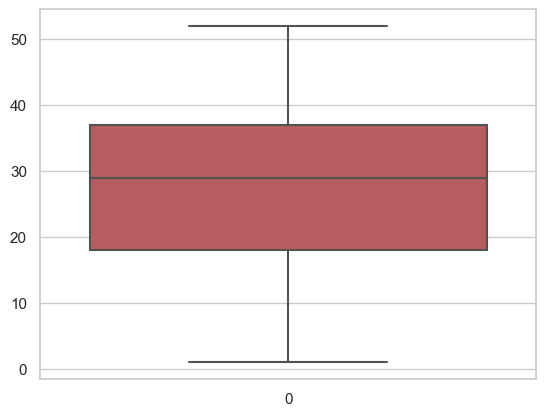

In [7]:
sns.boxplot(data['housing_median_age'],color='r')

In [8]:
df = pd.DataFrame(np.random.randn(100,3),columns=['A','B','C'])

NameError: name 'np' is not defined

In [ ]:
df['A'] = df['A'].cumsum()+20
df['B'] = df['B'].cumsum()+20
df['C'] = df['B'].cumsum()+20

In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt
import plotly as py
import cufflinks  as cf

In [ ]:
py.offline.init_notebook_mode()

In [ ]:
cf.go_offline()

In [70]:
df.iplot(kind='box')

In [72]:
data['median_house_value'].iplot(kind='box')

In [9]:
import pandas as pd

In [10]:
housing = pd.read_csv('housing.csv')
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
housing['median_house_value'].mean()

206855.81690891474

In [19]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1c68f9e0c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c68f9e3bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c68f9929d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c68f907050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c68f9060d0>],
 'means': []}

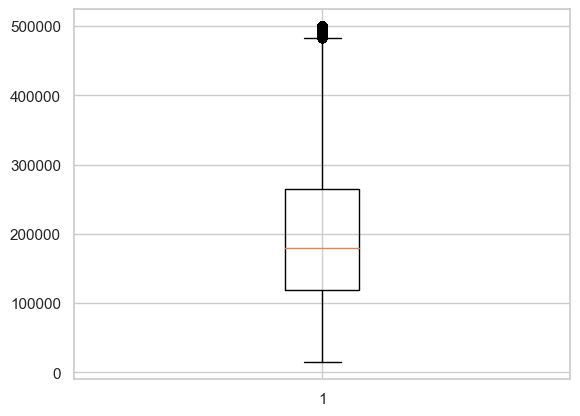

In [20]:
plt.boxplot(housing['median_house_value'])

<Axes: >

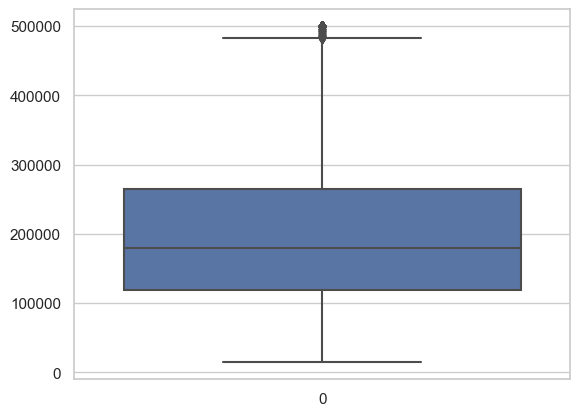

In [21]:
sns.boxplot(housing['median_house_value'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15692\309660280.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['median_house_value'])


<Axes: xlabel='median_house_value', ylabel='Density'>

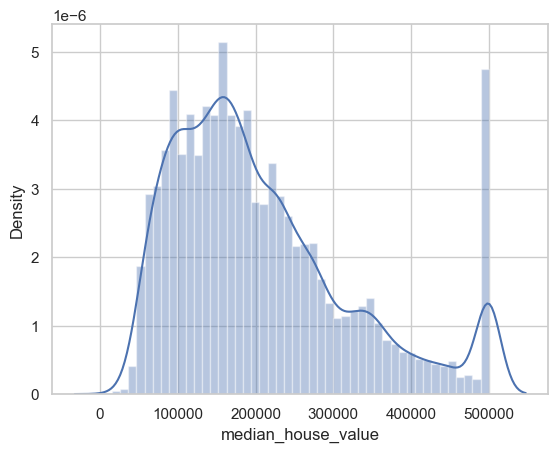

In [22]:
sns.distplot(housing['median_house_value'])

<Axes: title={'center': 'median_house_value'}, xlabel='ocean_proximity'>

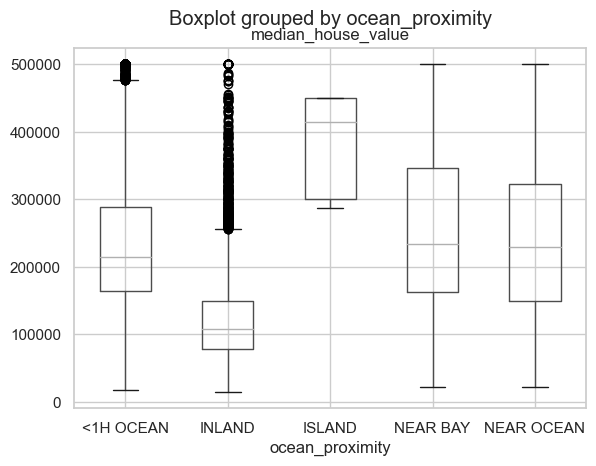

In [23]:
housing.boxplot(by='ocean_proximity',column=['median_house_value'])

In [33]:
housing[housing['ocean_proximity']=='ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [34]:
housing[housing['ocean_proximity']=='INLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0,INLAND
957,-121.90,37.66,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0,INLAND
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0,INLAND
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0,INLAND
968,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [35]:
tips = pd.read_csv('tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: title={'center': 'total_bill'}, xlabel='sex'>

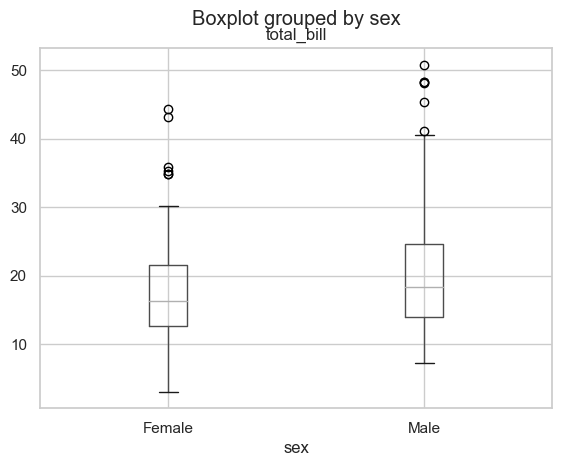

In [36]:
tips.boxplot(by='sex',column='total_bill')

<Axes: title={'center': 'tip'}, xlabel='day'>

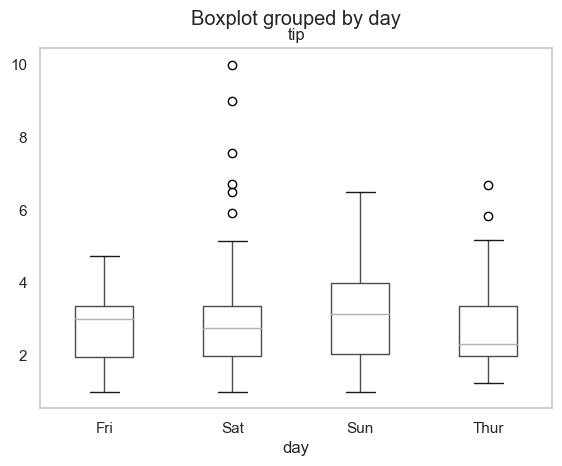

In [40]:
tips.boxplot(by='day',column='tip',grid=False)
# plt.xticks(rotation=45)

In [41]:
titanic = pd.read_csv('titanic.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: title={'center': 'fare'}, xlabel='sex'>

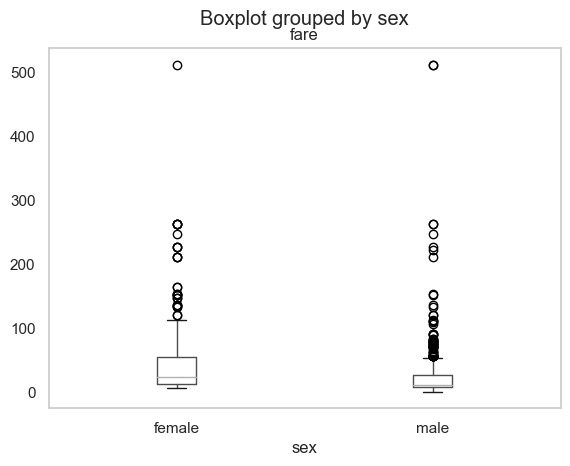

In [42]:
titanic.boxplot(by='sex',column='fare',grid=False)

<Axes: xlabel='median_house_value', ylabel='Count'>

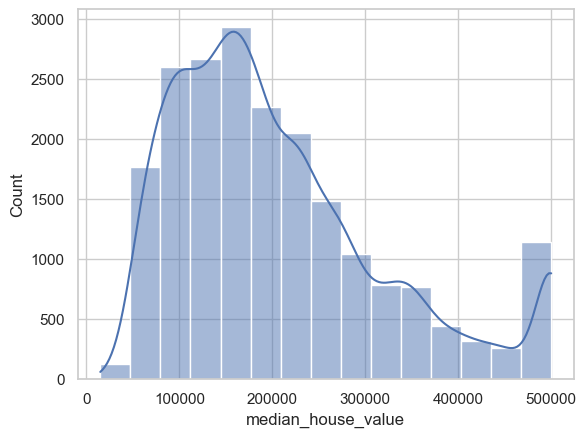

In [45]:
sns.histplot(housing['median_house_value'],bins=15,kde=True)

### Skewness 

When the distribution starts to get a little lopsided with long tails on one side, the mean measure of center can easily get pulled to that side. Distributions that aren't symmetric have some skew to them. A left (negative) skewed distribution has a long tail on the left-hand side; a right (positive) skewed distribution has a long tail on the right-hand side. In the presence of negative skew, the mean will be less than the median, while the reverse happens with a positive skew. When there is no skew, both will be equal:

In [52]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15692\1210902909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'])


<Axes: xlabel='fare', ylabel='Density'>

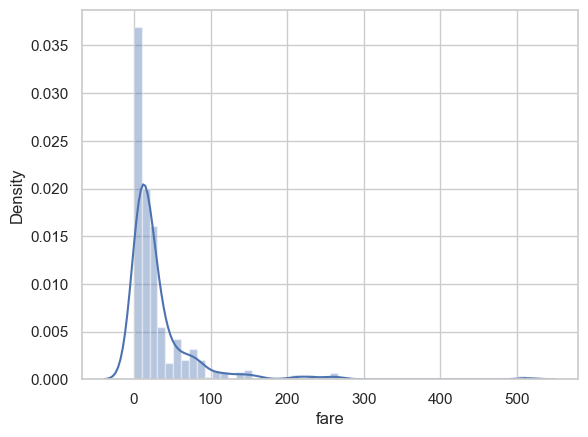

In [54]:
sns.distplot(titanic['fare'])

In [55]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


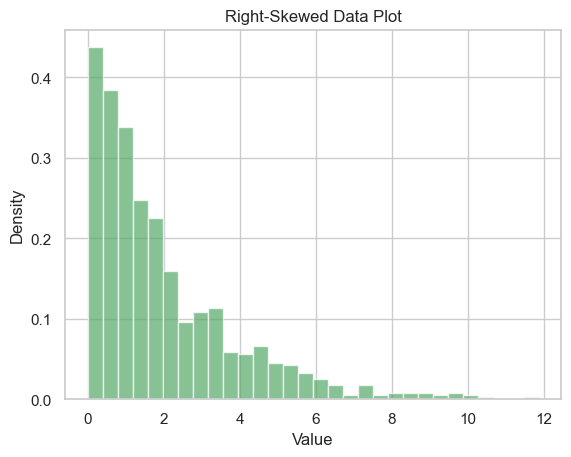

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Generating right-skewed data
data = np.random.exponential(scale=2, size=1000)  # You can use different distributions as per your requirement

# Creating a histogram plot
plt.hist(data, bins=30, density=True, alpha=0.7, color='g')
plt.title('Right-Skewed Data Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


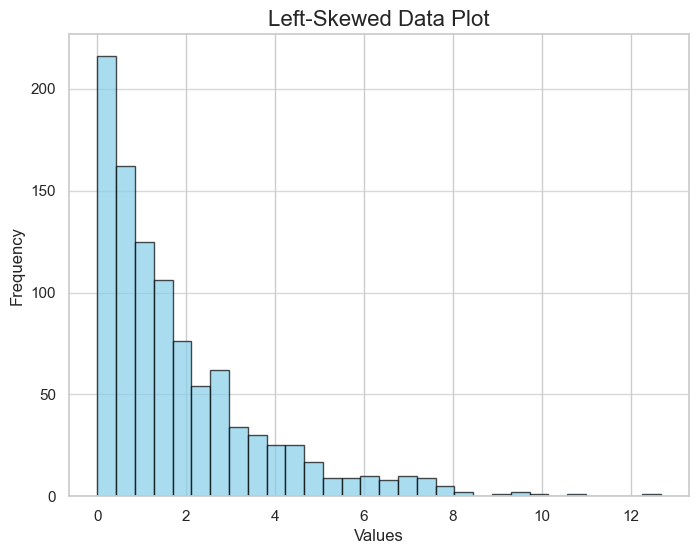

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Generating left-skewed data using numpy
data = np.random.exponential(scale=2, size=1000)  # Exponential distribution for left-skewed data

# Plotting the data
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Left-Skewed Data Plot', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()


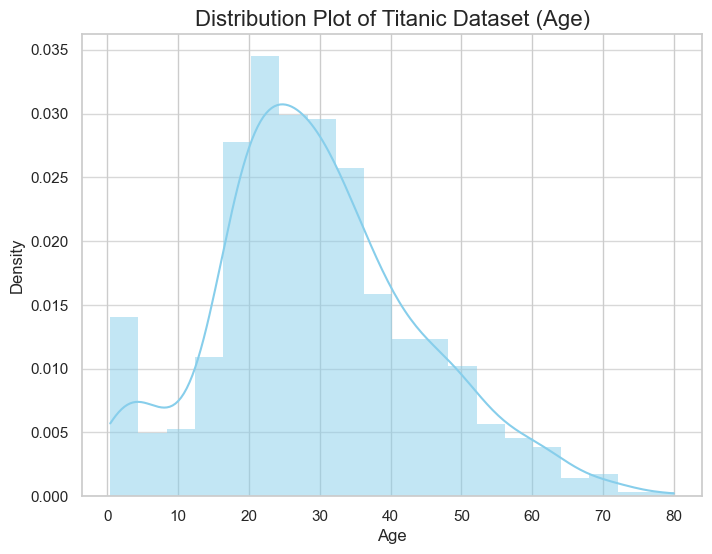

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting the distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x="age", kde=True, color='skyblue', stat='density', linewidth=0)
plt.title('Distribution Plot of Titanic Dataset (Age)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [62]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

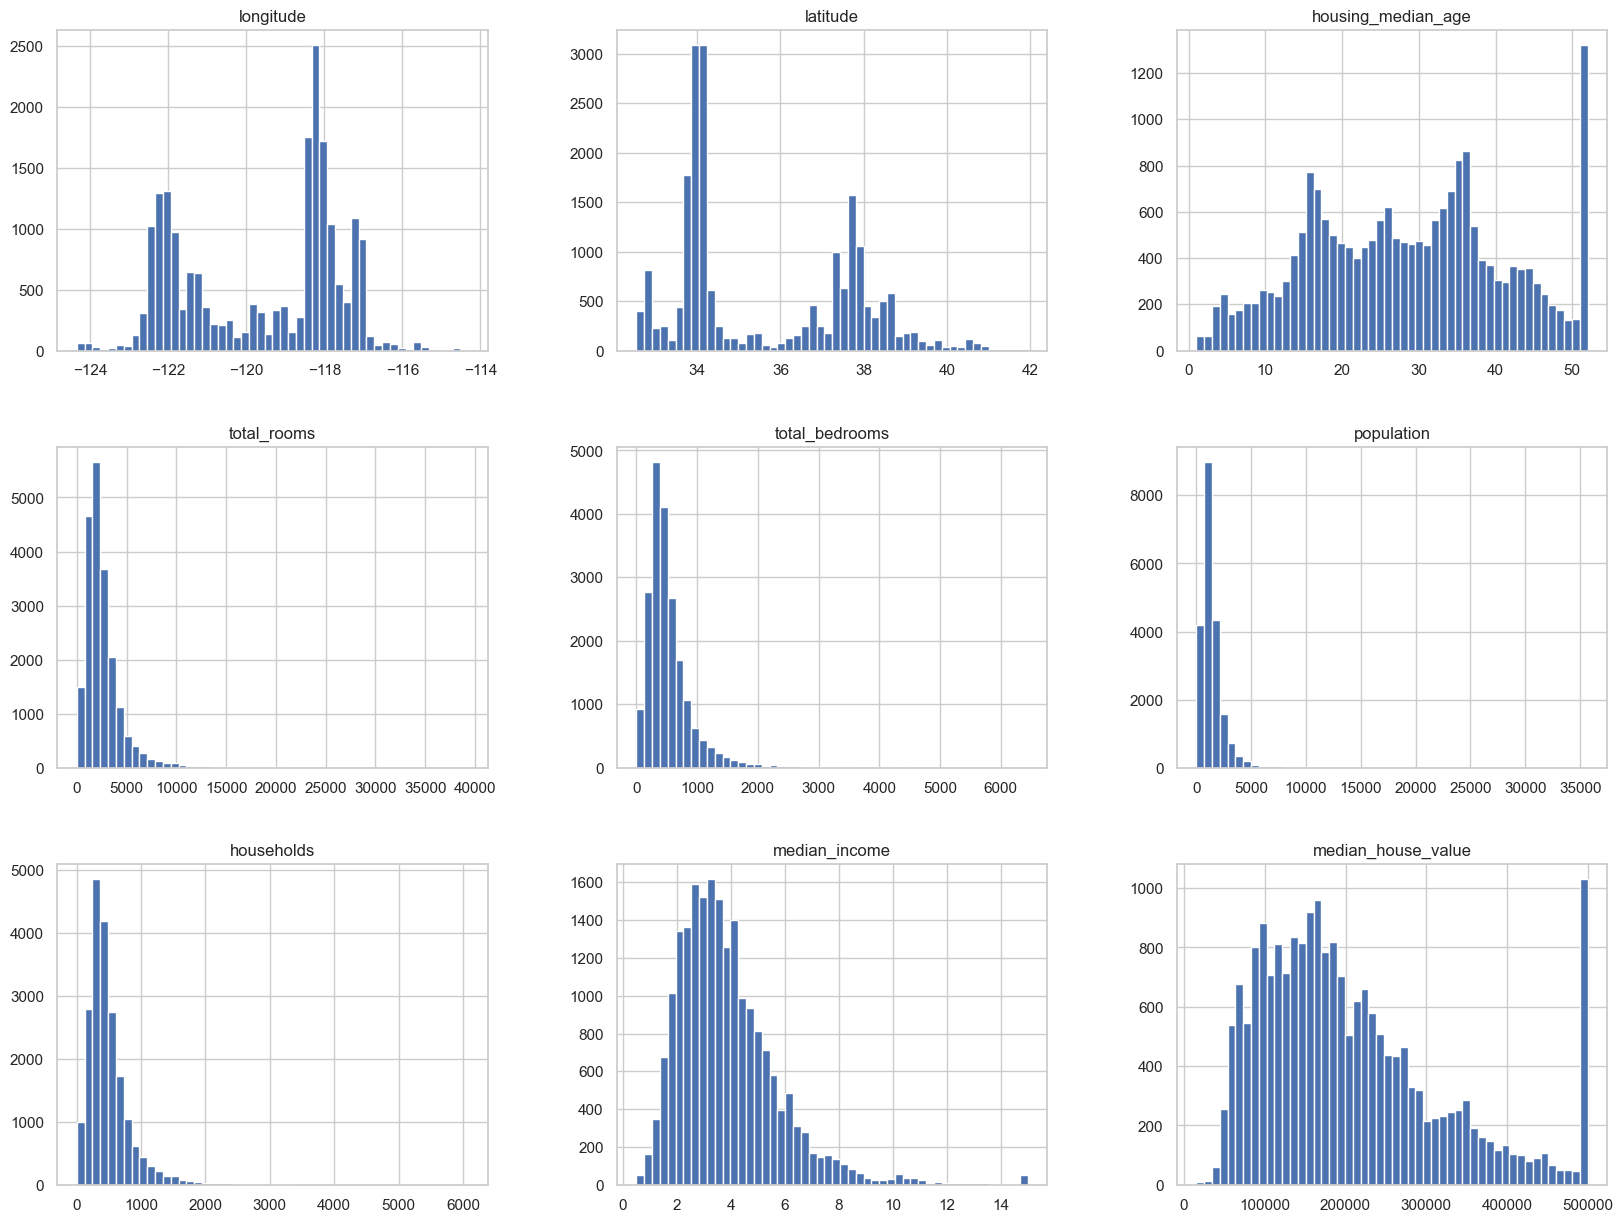

In [66]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

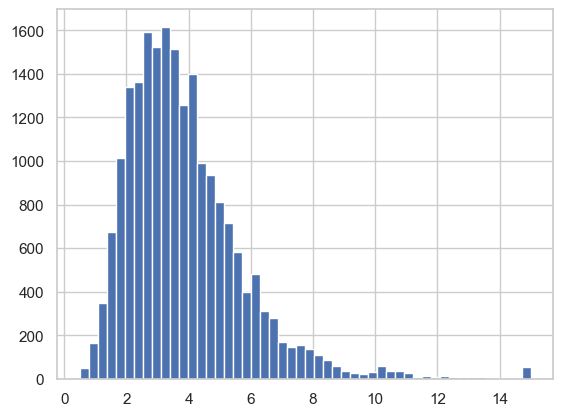

In [68]:
housing.median_income.hist(bins=50)

### 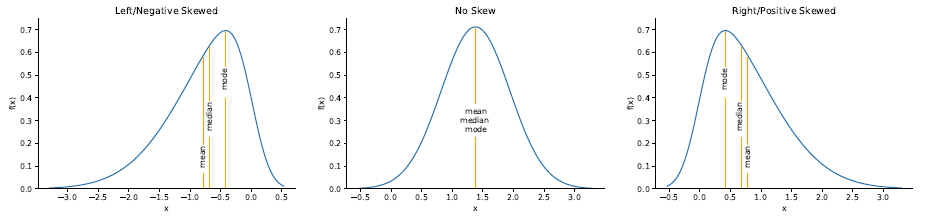